*Автор: Петухов Дмитрий*<br />
*Дата: 04.03.2018*

# <center>Коэффициент Джини. Из экономики в машинное обучение.

Интересный факт: в 1912 году итальянский статистик и демограф Коррадо Джини написал знаменитый труд «Вариативность и изменчивость признака», и в этом же году "Титаник" затонул в водах Атлантики. Казалось бы, что общего между этими двумя событиями? Всё просто, их последствия нашли широкое применение в области машинного обучения. И если датасет "Титаник" в представлении не нуждается, то об одной замечательной статистике, впервые опубликованной в труде итальянского учёного, мы поговорим поподробней.

Коэффициент Джини (Gini coefficient) - метрика качества, которая часто используется при оценке предсказательных моделей в задачах бинарной классификации в условиях сильной несбалансированности классов целевой переменной. Именно она широко применяется в задачах банковского кредитования, страхования и целевом маркетинге. Для полного понимания этой метрики нам для начала необходимо окунуться в экономику и разобраться, для чего она используется там.

## <center>Экономика

Коэффициент Джини - это статистический показатель степени расслоения общества относительно какого-либо экономического признака (годовой доход, имущество, недвижимость), используемый в странах с развитой рыночной экономикой. В основном в качестве рассчитываемого показателя берется уровень годового дохода. Коэффициент показывает отклонение фактического распределения доходов в обществе от абсолютно равного их распределения между населением и позволяет очень точно оценить неравномерность распределения доходов в обществе. Стоит заметить, что немного ранее появления на свет коэффициента Джини, в 1905 году, американский экономист Макс Лоренц в своей работе "Методы измерения концентрации богатства" предложил способ измерения концентрации благосостояния общества, получивший позже название "Кривая Лоренца". Далее мы покажем, что Коэффициент Джини является абсолютно точной алгебраической интерпретацией Кривой Лоренца, а она в свою очередь является его графическим отображением.  

<center>
<img src="../../img/gini_curve.png" style="width: 600px">

Кривая Лоренца - это графическое представление доли совокупного дохода, приходящейся на каждую группу населения. Диагонали на графике соответствует "линия абсолютного равенства" - у всего населения доходы одинаковые.

Коэффициент Джини изменяется от 0 до 1. Чем больше его значение отклоняется от нуля и приближается к единице, тем в большей степени доходы сконцентрированы в руках отдельных групп населения и тем выше уровень общественного неравенства в государстве, и наоборот. Иногда используется процентное представление этого коэффициента, называемое индексом Джини (значение варьируется от 0% до 100%). 

В экономике существует <a href="https://en.wikipedia.org/wiki/Gini_coefficient#Calculation">несколько способов</a> рассчитать этот коэффициент, мы остановимся на формуле Брауна (предварительно необходимо создать вариационный ряд - отранжировать население по доходам):

$$\large 
G = 1 - \sum_{k=1}^n(X_k - X_{k-1})(Y_k + Y_{k-1})$$

где $n$ - число жителей, $X_k$ - кумулятивная доля населения, $Y_k$ - кумулятивная доля дохода для $X_k$

Давайте разберем вышеописанное на игрушечном примере, чтобы интуитивно понять смысл этой статистики.

Предположим, есть три деревни, в каждой из которых проживает 10 жителей. В каждой деревне суммарный годовой доход населения 100 рублей. В первой деревне все жители зарабатывают одинаково - 10 рублей в год, во второй деревне распределение дохода иное: 3 человека зарабатывают по 5 рублей, 4 человека - по 10 рублей и 3 человека по 15 рублей. И в третьей деревне 7 человек получают 1 рубль в год, 1 человек - 10 рублей, 1 человек - 33 рубля и один человек - 50 рублей. Для каждой деревни рассчитаем коэффициент Джини и построим кривую Лоренца.

Представим исходные данные по деревням в виде таблицы и сразу рассчитаем $X_k$ и $Y_k$ для наглядности:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

village = pd.DataFrame({'Person':['Person_{}'.format(i) for i in range(1,11)], 
                        'Income_Village_1':[10]*10, 
                        'Income_Village_2':[5,5,5,10,10,10,10,15,15,15],
                        'Income_Village_3':[1,1,1,1,1,1,1,10,33,50]})
village['Cum_population'] =  np.cumsum(np.ones(10)/10)
village['Cum_Income_Village_1'] =  np.cumsum(village['Income_Village_1']/100)
village['Cum_Income_Village_2'] =  np.cumsum(village['Income_Village_2']/100)
village['Cum_Income_Village_3'] =  np.cumsum(village['Income_Village_3']/100)
village = village.iloc[:, [3,4,0,5,1,6,2,7]]
village

,Person,Cum_population,Income_Village_1,Cum_Income_Village_1,Income_Village_2,Cum_Income_Village_2,Income_Village_3,Cum_Income_Village_3
0,Person_1,0.1,10,0.1,5,0.05,1,0.01
1,Person_2,0.2,10,0.2,5,0.10,1,0.02
2,Person_3,0.3,10,0.3,5,0.15,1,0.03
3,Person_4,0.4,10,0.4,10,0.25,1,0.04
4,Person_5,0.5,10,0.5,10,0.35,1,0.05
5,Person_6,0.6,10,0.6,10,0.45,1,0.06
6,Person_7,0.7,10,0.7,10,0.55,1,0.07
7,Person_8,0.8,10,0.8,15,0.70,10,0.17
8,Person_9,0.9,10,0.9,15,0.85,33,0.50
9,Person_10,1.0,10,1.0,15,1.00,50,1.00


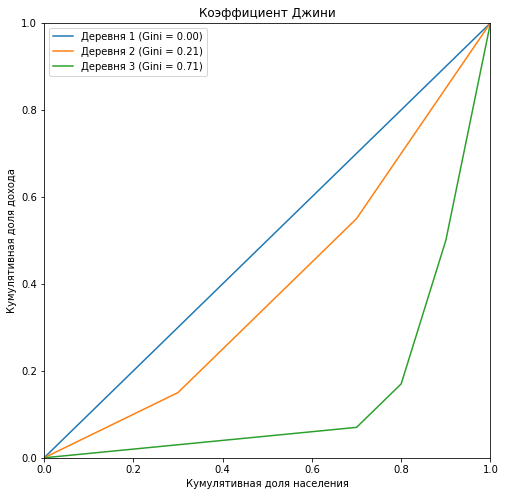

In [2]:
plt.figure(figsize = (8,8))
Gini=[]

for i in range(1,4):
    X_k = village['Cum_population'].values
    X_k_1 = village['Cum_population'].shift().fillna(0).values
    Y_k = village['Cum_Income_Village_{}'.format(i)].values
    Y_k_1 = village['Cum_Income_Village_{}'.format(i)].shift().fillna(0).values
    Gini.append(1 - np.sum((X_k - X_k_1) * (Y_k + Y_k_1)))
    plt.plot(np.insert(X_k,0,0), np.insert(village['Cum_Income_Village_{}'.format(i)].values,0,0),
             label='Деревня {} (Gini = {:0.2f})'.format(i, Gini[i-1]))
        
plt.title('Коэффициент Джини')
plt.xlabel('Кумулятивная доля населения')
plt.ylabel('Кумулятивная доля дохода')
plt.legend(loc="upper left")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

Видно, что кривая Лоренца для коэффициента Джини в первой деревне полностью совпадает с диагональю ("линия абсолютного равенства"), и чем больше расслоение среди населения относительно годового дохода, тем больше площадь фигуры, образуемой кривой Лоренца и диагональю. Покажем на примере третьей деревни, что отношение площади этой фигуры к площади треугольника, образуемого линией абсолютного равенства, в точности равна значению коэффициента Джини:

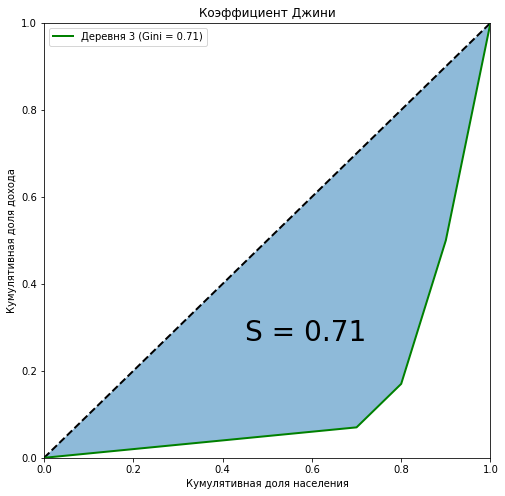

In [3]:
curve_area = np.trapz(np.insert(village['Cum_Income_Village_3'].values,0,0), np.insert(village['Cum_population'].values,0,0))
S = (0.5 - curve_area) / 0.5

plt.figure(figsize = (8,8))
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
plt.plot(np.insert(village['Cum_population'].values,0,0), np.insert(village['Cum_Income_Village_3'].values,0,0),
             label='Деревня {} (Gini = {:0.2f})'.format(i, Gini[i-1]),lw = 2,color = 'green')

plt.fill_between(np.insert(X_k,0,0), np.insert(X_k,0,0), y2=np.insert(village['Cum_Income_Village_3'].values,0,0), alpha=0.5)
plt.text(0.45,0.27,'S = {:0.2f}'.format(S),fontsize = 28)
plt.title('Коэффициент Джини')
plt.xlabel('Кумулятивная доля населения')
plt.ylabel('Кумулятивная доля дохода')
plt.legend(loc="upper left")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

Мы показали, что наряду с алгебраическими методами, одним из способов вычисления коэффициента Джини является геометрический - вычисление доли площади между кривой Лоренца и линией абсолютного равенства доходов от общей площади под прямой абсолютного равенства доходов.

Ещё один немаловажный момент. Давайте мысленно закрепим концы кривой в точках $(0,0)$ и $(1,1)$ и начнем изменять её форму. Вполне очевидно, что площадь фигуры не изменится, но тем самым мы переводим членов общества из "среднего класса" в бедные или богатые при этом не меняя соотношения доходов между классами. Возьмем для примера десять человек со следующим доходом:

$[1, 1, 1, 1, 1, 1, 1, 1, 20, 72]$

Теперь к человеку с доходом "20" применим метод Шарикова "Отобрать и поделить!", перераспределив его доход пропорционально между остальными членами общества. В этом случае коэффициент Джини не изменится и останется равным 0,772 , мы просто притянули "закрепленную" кривую Лоренца к оси абсцисс и изменили её форму:

$[1+11.1/20, 1+11.1/20, 1+11.1/20, 1+11.1/20, 1+11.1/20, 1+11.1/20, 1+11.1/20, 1+11.1/20, 1+11.1/20, 72+8.9/20]$

Давайте остановимся на ещё одном важном моменте: рассчитывая коэффициент Джини, мы никак не классифицируем людей на бедных и богатых, он никак не зависит от того, кого мы сочтем нищим или олигархом. Но предположим, что перед нами встала такая задача, для этого в зависимости от того, что мы хотим получить, какие у нас цели, нам необходимо будет задать порог дохода четко разделяющий людей на бедных и богатых. Если вы увидели в этом аналогию с Threshold из задач бинарной классификации, то нам пора переходить к машинному обучению.

## <center>Машинное обучение
### 1. Общее понимание

Сразу стоит заметить, что, придя в машинное обучение, коэффициент Джини сильно изменился: он рассчитывается по-другому и имеет другой смысл. Численно коэффициент равен площади фигуры, образованной линией абсолютного равенства и кривой Лоренца. Остались и общие черты с родственником из экономики, например, нам всё также необходимо построить кривую Лоренца и посчитать площади фигур. И что самое главное - не изменился алгоритм построения кривой. Кривая Лоренца тоже претерпела изменения, она получила название Lift Curve и является зеркальным отображением кривой Лоренца относительно линии абсолютного равенства (за счет того, что ранжирование вероятностей происходит не по возрастанию, а по убыванию). Разберем всё это на очередном игрушечном примере. Для минимизации ошибки при расчете площадей фигур будем использовать функции scipy <b>interp1d</b> (интерполяция одномерной функции) и <b>quad</b> (вычисление определенного интеграла).

Предположим, мы решаем задачу бинарной классификации для 15 объектов и у нас следующее распределение классов:

<center>
$[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]$

Наш обученный алгоритм предсказывает следующие вероятности отношения к классу "1" на этих объектах:

<center>
<img src="../../img/data.png">

Рассчитаем коэффициент Джини для двух моделей: наш обученный алгоритм и идеальная модель, точно предсказывающая классы с вероятностью 100%. Идея следующая: вместо ранжирования населения по уровню дохода, мы ранжируем объекты по предсказанным моделью вероятностям по убыванию и подставляем в формулу кумулятивную долю истинных значений целевой переменной, соответствующих предсказанным вероятностям. Иными словами, сортируем таблицу по строке "Predict" и считаем кумулятивную долю истинных классов вместо кумулятивной доли доходов.

<center>
<img src="../../img/data_sorted_cum.png">

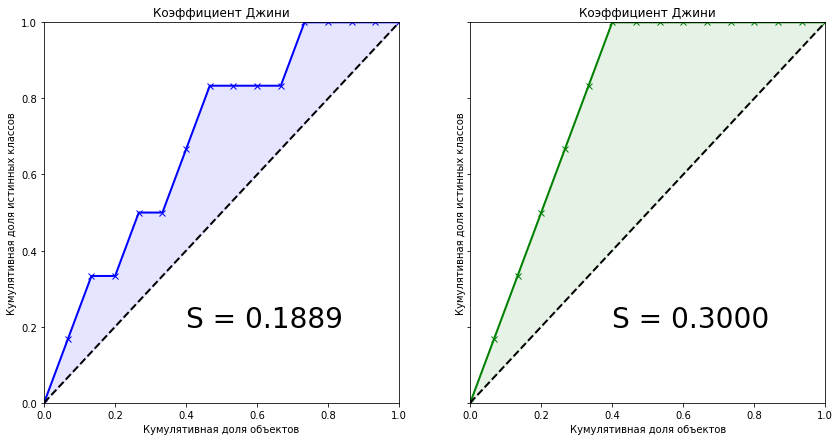

In [8]:
from scipy.interpolate import interp1d
from scipy.integrate import quad

actual = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
predict = [0.9, 0.3, 0.8, 0.75, 0.65, 0.6, 0.78, 0.7, 0.05, 0.4, 0.4, 0.05, 0.5, 0.1, 0.1]

data = zip(actual, predict)
sorted_data = sorted(data, key=lambda d: d[1], reverse=True)
sorted_actual = [d[0] for d in sorted_data]

cumulative_actual = np.cumsum(sorted_actual) / sum(actual)
cumulative_index = np.arange(1, len(cumulative_actual)+1) / len(predict)
cumulative_actual_perfect = np.cumsum(sorted(actual, reverse=True)) / sum(actual)

x_values = [0] + list(cumulative_index)
y_values = [0] + list(cumulative_actual)
y_values_perfect = [0] + list(cumulative_actual_perfect)

f1, f2 = interp1d(x_values, y_values), interp1d(x_values, y_values_perfect)
S_pred = quad(f1, 0, 1, points=x_values)[0] - 0.5
S_actual = quad(f2, 0, 1, points=x_values)[0] - 0.5

fig, ax = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(14, 7))
ax[0].plot(x_values, y_values, lw = 2, color = 'blue', marker='x')
ax[0].fill_between(x_values, x_values, y_values, color = 'blue', alpha=0.1)
ax[0].text(0.4,0.2,'S = {:0.4f}'.format(S_pred),fontsize = 28)
ax[1].plot(x_values, y_values_perfect, lw = 2, color = 'green', marker='x')
ax[1].fill_between(x_values, x_values, y_values_perfect, color = 'green', alpha=0.1)
ax[1].text(0.4,0.2,'S = {:0.4f}'.format(S_actual),fontsize = 28)

for i in range(2):
    ax[i].plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
    ax[i].set(title='Коэффициент Джини', xlabel='Кумулятивная доля объектов', 
              ylabel='Кумулятивная доля истинных классов', xlim=(0, 1), ylim=(0, 1))
plt.show();

Коэффициент Джини для обученной модели равен 0.1889. Мало это или много? Насколько точен алгоритм? Без знания точного значения коэффициента для идеального алгоритма мы не можем сказать о нашей модели ничего. Поэтому метрикой качества в машинном обучении является <b>нормализованный коэффициент Джини</b>, который равен отношению коэффициента обученной модели к коэффициенту идеальной модели. Далее под термином "Коэффициент Джини" будем иметь ввиду именно это.    

$$\large 
Gini_{normalized} = \frac{Gini_{model}}{Gini_{perfect}}  (1)$$

Глядя на эти два графика мы можем сделать следующие выводы:
- Предсказание идеального алгоритма является максимальным коэффициентом Джини для текущего набора данных и зависит только от истинного распределения классов в задаче. 
- Площадь фигуры для идеального алгоритма равна:
$$ S = \frac{Число\enspace объектов\enspace класса\enspace 0\enspace в \enspaceвыборке}{2}$$
- Предсказания обученных моделей не могут быть больше значения коэффициента идеального алгоритма.   
- При равномерном распределении классов целевой переменной коэффициент Джини идеального алгоритма всегда будет равен 0.25
- Для идеального алгоритма форма фигуры, образуемой Lift Curve и и линией абсолютного равенства, всегда будет треугольником
- Коэффициент Джини случайного алгоритма равен 0, а Lift Curve совпадает с линией абсолютного равенства
- Коэффициент Джини обученного алгоритма будет всегда меньше коэффициента идеального алгоритма
- Значения нормализованного коэффициента Джини для обученного алгоритма находятся в интервале [0, 1]. 
- Нормализованный коэффициент Джини является метрикой качества, которую необходимо максимизировать.

### 2. Алгебраическое представление. Доказательство линейной связи с AUC ROC.
Мы подошли к самому, пожалуй, интересному моменту - алгебраическому представлению коэффициента Джини. Как рассчитать эту метрику? Она не равна своему родственнику из экономики. Известно, что коэффициент можно вычислить по следующей формуле: 

$$\large 
Gini_{normalized} = 2 * AUCROC - 1 \hspace{35pt} (2)$$

Я честно пытался найти вывод этой формулы в интернете, но не нашел ничего. Даже в зарубежных книгах и научных статьях. Зато на некоторых сомнительных сайтах любителей статистики встречалась фраза: *"Это настолько очевидно, что даже нечего обсуждать. Достаточно сравнить графики Lift Curve и ROC Curve, чтобы  сразу всё стало понятно"*. Чуть позже, когда сам вывел формулу связи этих двух метрик, понял что эта фраза - отличный индикатор. Если вы её слышите или читаете, то очевидно только то, что автор фразы не имеет никакого понимания коэффициента Джини. Давайте взглянем на графики Lift Curve и ROC Curve для нашего примера:

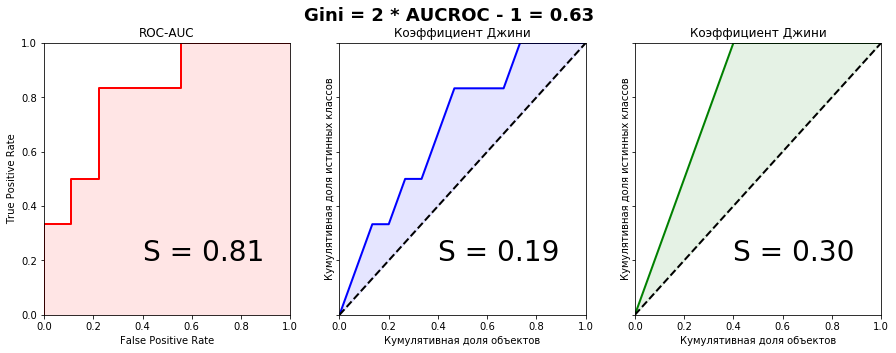

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score

aucroc = roc_auc_score(actual, predict)
gini = 2*roc_auc_score(actual, predict)-1
fpr, tpr, t = roc_curve(actual, predict)


fig, ax = plt.subplots(nrows=1,ncols=3, sharey=True, figsize=(15, 5))
fig.suptitle('Gini = 2 * AUCROC - 1 = {:0.2f}\n\n'.format(gini),fontsize = 18, fontweight='bold')
ax[0].plot([0]+fpr.tolist(), [0]+tpr.tolist(), lw = 2, color = 'red')
ax[0].fill_between([0]+fpr.tolist(), [0]+tpr.tolist(), color = 'red', alpha=0.1)
ax[0].text(0.4,0.2,'S = {:0.2f}'.format(aucroc),fontsize = 28)
ax[1].plot(x_values, y_values, lw = 2, color = 'blue')
ax[1].fill_between(x_values, x_values, y_values, color = 'blue', alpha=0.1)
ax[1].text(0.4,0.2,'S = {:0.2f}'.format(S_pred),fontsize = 28)
ax[2].plot(x_values, y_values_perfect, lw = 2, color = 'green')
ax[2].fill_between(x_values, x_values, y_values_perfect, color = 'green', alpha=0.1)
ax[2].text(0.4,0.2,'S = {:0.2f}'.format(S_actual),fontsize = 28)

ax[0].set(title='ROC-AUC', xlabel='False Positive Rate', 
              ylabel='True Positive Rate', xlim=(0, 1), ylim=(0, 1))
for i in range(1,3):
    ax[i].plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
    ax[i].set(title='Коэффициент Джини', xlabel='Кумулятивная доля объектов', 
              ylabel='Кумулятивная доля истинных классов', xlim=(0, 1), ylim=(0, 1))
plt.show();

Прекрасно видно, что из графического представления метрик связь уловить невозможно, поэтому докажем равенство алгебраически. У меня получилось сделать это двумя способами - параметрически (интегралами) и непараметрически (через статистику Вилкоксона-Манна-Уитни). Второй способ значительно проще и без многоэтажных дробей с двойными интегралами, поэтому детально остановимся именно на нем. Для дальнейшего рассмотрения доказательств определимся с терминологией: кумулятивная доля истинных классов - это не что иное, как True Positive Rate. Кумулятивная доля объектов - это в свою очередь количество объектов в отранжированном ряду (при масштабировании на интервал (0, 1) - соответственно доля объектов).

Для понимания доказательства необходимо базовое понимание метрики ROC-AUC - что это вообще такое, как строится график и в каких осях. Рекомендую статью из блога Александра Дьяконова <a href="https://alexanderdyakonov.wordpress.com/2017/07/28/auc-roc-%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C-%D0%BF%D0%BE%D0%B4-%D0%BA%D1%80%D0%B8%D0%B2%D0%BE%D0%B9-%D0%BE%D1%88%D0%B8%D0%B1%D0%BE%D0%BA/">"AUC ROC (площадь под кривой ошибок)"</a>

Введём следующие обозначения:

- $n$ - Количество объектов в выборке
- $n_0$ - Количество объектов класса "0"
- $n_1$ - Количество объектов класса "1"
- $TP$ - True Positive (верный ответ модели на истинном классе "1" при заданном пороге)
- $FP$ - False Positive (неверный ответ модели на истинном классе "0" при заданном пороге)
- $TPR$ - True Positive Rate (отношение $TP$ к $n_1$) 
- $FPR$ - False Positive Rate (отношение $FP$ к $n_0$)
- $i,j$ - текущий индекс элемента.

#### Параметрический метод

Параметрическое уравнение для ROC curve можно записать в следующем виде:

$$AUC = \int_{0}^{1} TPR \enspace dFPR = \int_{0}^{1} \frac{TP}{n_1} \enspace d\frac{FP}{n_0} = \frac{1}{n_1*n_0}\int_{0}^{1}TP  \enspace dFP \hspace{35pt} (3)$$     

При построении графика Lift Curve по оси $X$ мы откладывали долю объектов (их количество) предварительно отсортированных по убыванию. Таким образом, параметрическое уравнение для Коэффициента Джини будет выглядеть следующим образом:

$$AUC = \int_{0}^{1} TPR \enspace d\frac{TP + FP}{P+N} - 0.5 \hspace{35pt} (4)$$ 

Подставив выражение (4) в выражение (1) для обеих моделей и преобразовав его, мы увидим, что в одну из частей можно будет подставить выражение (3), что в итоге даст нам красивую формулу нормализованного Джини (2) 

#### Непараметрический метод

При доказательстве я опирался на элементарные постулаты Теории Вероятностей. Известно, что численно значение AUC ROC равно статистике Вилкоксона-Манна-Уитни:

$$\large
AUCROC = \frac{\sum_{i=1}^{n_1} \sum_{i=1}^{n_0} S(x_i, x_j)}{n_1*n_0} \hspace{35pt} (5)$$

$$S(x_i, x_j) = \begin{cases}
  1, \enspace x_i > x_j\\    
  \frac{1}{2}, \enspace x_i = x_j \\  
  0,\enspace x_i < x_j 
\end{cases}$$

где $x_i$ - ответ алгоритма на i-ом объекте из распределения "1", $x_о$ - ответ алгоритма на j-ом объекте из распределения "0"

Доказательство этой формулы можно, например, найти <a href="https://stats.stackexchange.com/questions/272314/how-does-auc-of-roc-equal-concordance-probability">здесь</a>

Интерпретируется это очень интуитивно понятно: если случайным образом извлечь пару объектов, где первый объект будет из распределения "1", а второй из распределения "0", то вероятность того, что первый объект будет иметь предсказанное значение больше или равно, чем предсказанное значение второго объекта, равно значению AUC ROC. Комбинаторно несложно подсчитать, что количество пар таких объектов будет: $n_1*n_0$. 

Пусть модель прогнозирует $k$ возможных значений из множества $ S =\{s_1, \dots, s_k\}$, где   $s_1< \enspace...\enspace < s_k$ и $S$ - какое-то вероятностное распределение, элементы которого принимают значения на интервале $[0,1]$.
Пусть $S_{n_1}$ множество значений, которые принимают объекты $n_1$ и $S_{n_1} \subseteq S$. Пусть $S_{n_0}$ множество значений, которые принимают объекты $n_0$ и $S_{n_0} \subseteq S$. Очевидно, что множества $S_{n_1}$ и $S_{n_0}$ могут пересекаться.

Обозначим $p_{n_{0}}^{i}$ как вероятность того, что объект $n_0$ примет значение $s_i$, и $p_{n_{1}}^{i}$ как вероятность того, что объект $n_1$ примет значение $s_i$. Тогда $\sum_{i=1}^{k}p_{n_{0}}^{i}=1$ и $\sum_{i=1}^{k}p_{n_{1}}^{i}=1$

Имея априорную вероятность $\pi$ для каждого объекта выборки, можем записать формулу, определяющую вероятность того, что объект примет значение $s_i$: $$p_{n}^{i} = \pi p_{n_{0}}^{i} + (1-\pi)p_{n_{1}}^{i}$$ 
Зададим три функции распределения:
- для объектов класса "1"
- для объектов класса "0"
- для всех объектов выборки
$$CDF_{n_{1}}^{i} = \sum_{j=1}^{i} p_{n_{1}}^{i} \hspace{10pt}i =1, \dots, k$$
$$CDF_{n_{0}}^{i} = \sum_{j=1}^{i} p_{n_{0}}^{i} \hspace{10pt}i =1, \dots, k$$
$$CDF_{n}^{i} = \sum_{j=1}^{i} p_{n}^{i} \hspace{10pt}i =1, \dots, k$$

Пример того, как могут выглядеть функции распределения для двух классов в задаче кредитного скоринга:

<center>
<img src="../../img/KS.png">

На рисунке также показана статистика Колмогорова-Смирнова, которая также применяется для оценки моделей. 

Запишем формулу Вилкоксона в вероятностном виде и преобразуем её:

$$AUCROC = P(S_{n_1}>S_{n_1}) + \frac{1}{2}P (S_{n_1}=S_{n_1})= \\
\sum_{i=1}^{k} P(S_{n_1} \geq s_{i-1}) P(S_{n_0} = s_{i}) + \frac{1}{2}\sum_{i=1}^{k} P(S_{n_1} = s_{i}) P(S_{n_0} = s_{i}) = \\
\sum_{i=1}^{k} \big((P(S_{n_1} \geq s_{i-1}) + \frac{1}{2}P(S_{n_1} = s_{i})\big) P(S_{n_0} = s_{i}) = \\
\sum_{i=1}^{k} \frac{1}{2} \big((P(S_{n_1} \geq s_{i}) + (P(S_{n_1} \geq s_{i-1})\big) P(S_{n_0} = s_{i}) = \\
\sum_{i=1}^{k} \frac{1}{2} (CDF_{n_{1}}^{i} + CDF_{n_{1}}^{i-1})(CDF_{n_{0}}^{i} - CDF_{n_{0}}^{i-1}) \hspace{35pt} (6)$$

Аналогичную формулу можем выписать для площади под Lift Curve (помним, что она состоит из суммы двух площадей, одна из которых всегда равна 0.5):

$$AUC Lift = Gini_{model} + 0.5 = \sum_{i=1}^{k} \frac{1}{2} (CDF_{n_{1}}^{i} + CDF_{n_{1}}^{i-1})(CDF_{n}^{i} - CDF_{n}^{i-1}) \hspace{35pt} (7)$$

И теперь преобразуем её:

$$AUC Lift = Gini + 0.5 = \sum_{i=1}^{k} \frac{1}{2} (CDF_{n_{1}}^{i} + CDF_{n_{1}}^{i-1})(CDF_{n}^{i} - CDF_{n}^{i-1}) = \\
\sum_{i=1}^{k} \frac{1}{2} (CDF_{n_{1}}^{i} + CDF_{n_{1}}^{i-1}) \big(\pi(CDF_{n_{1}}^{i} - CDF_{n_{1}}^{i-1}) + (1-\pi)(CDF_{n_{0}}^{i} - CDF_{n_{0}}^{i-1})\big) = \\
(1-\pi)\sum_{i=1}^{k} \frac{1}{2}(CDF_{n_{1}}^{i} + CDF_{n_{1}}^{i-1})(CDF_{n_{0}}^{i} - CDF_{n_{0}}^{i-1}) + 
\pi\sum_{i=1}^{k} \frac{1}{2}(CDF_{n_{1}}^{i} + CDF_{n_{1}}^{i-1})(CDF_{n_{1}}^{i} - CDF_{n_{1}}^{i-1}) = \\
(1-\pi) AUCROC + \frac{1}{2} \pi \sum_{i=1}^{k} \big( (CDF_{n_{1}}^{i})_{}^{2} - (CDF_{n_{0}}^{i-1})_{}^{2} \big) = \\
(1-\pi) AUCROC + \frac{1}{2} \pi \hspace{35pt} (8)$$

Для идеальной модели формула запишется просто:

$$Gini_{perfect}= \frac{1}{2}(1-\pi)\hspace{35pt} (9)$$ 

Следовательно из (8) и (9), получим:

$$\large 
Gini_{normalized} = \frac{Gini_{model}}{Gini_{perfect}} = \frac{(1-\pi) AUCROC + \frac{1}{2}}{\frac{1}{2}(1-\pi)} = 2AUCROC - 1$$

Как говорили в школе, что и требовалось доказать.

### 3. Практическое применение.

Как упоминалось в начале статьи, коэффициент Джини применяется для оценки моделей во многих сферах, в том числе в задачах банковского кредитования, страхования и целевом маркетинге. И этому есть вполне разумное объяснение. Эта статья не ставит перед собой целью подробно остановиться на практическом применении статистики в той или иной области. На эту тему написаны многие книги, мы лишь кратко пробежимся по этой теме.

#### Кредитный скоринг

По всему миру банки ежедневно получают тысячи заявок на выдачу кредита. Разумеется, необходимо как-то оценивать риски того, что клиент может просто-напросто не вернуть кредит, поэтому разрабатываются предиктивные модели, оценивающие по признаковому пространству вероятность того, что клиент не выплатит кредит, и эти модели в первую очередь надо как-то оценивать и, если модель удачная, то выбирать оптимальный порог (threshold) вероятности. Выбор оптимального порога определяется политикой банка. Задача анализа при подборе порога - минимизировать риск упущенной выгоды, связанной с отказом в выдаче кредита. Но чтобы выбирать порог, надо иметь качественную модель. Основные метрики качества в банковской сфере:
- Коэффициент Джини
- Статистика Колмогорова-Смирнова (вычисляется как максимальная разница между кумулятивными функциями распределения «плохих» и «хороших» заемщиков. Выше в статье приводился рисунок с распределениями и этой статистикой)
- Коэффициент дивергенции (представляет собой оценку разницы математических ожиданий распределений скоринговых баллов для «плохих» и «хороших» заемщиков, нормализованную дисперсиями этих распределений. Чем больше значение коэффициента дивергенции, тем лучше качество модели.) 

Не знаю как обстоят дела в России, хоть и живу здесь, но в Европе наиболее широко применяется коэффициент Джини, в Северной Америке - статистика Колмогорова-Смирнова.

#### Страхование
В этой области всё аналогично банковской сфере, с той лишь разницей, что нам необходимо разделить клиентов на тех, кто подаст страховое требование и на тех, кто этого не сделает. Рассмотрим практический пример из этой области, в котором будет хорошо видна одна особенность Lift Curve - при сильно несбалансированных классах в целевой переменной кривая почти идеально совпадает с ROC-кривой.

Несколько месяцев назад на Kaggle проходило соревнование "Porto Seguro’s Safe Driver Prediction", в котором задачей было как раз прогнозирование "Insurance Claim" - подача страхового требования. И в котором я по собственной глупости упустил серебро, выбрав не тот сабмит. 

<center>
<img src="../../img/porto.png">

Это было очень странное и в то же время невероятно познавательное соревнование. И с рекордным количеством участников - 5169. Победитель соревнования <a href="https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/discussion/44629">Michael Jahrer</a> написал код только на C++/CUDA, и это вызывает восхищение и уважение. 

Porto Seguro - бразильская компания, специализирующаяся в области автострахования.
Датасет состоял из 595207 строк в трейне, 892816 строк в тесте и 53 анонимизированных признаков. Соотношение классов в таргете - 3% и 97%. Напишем простенький бейзлайн, благо это делается в пару строк, и построим графики. Обратите внимание, кривые почти идеально совпадают, разница в площадях под Lift Curve и ROC Curve - 0.005. 

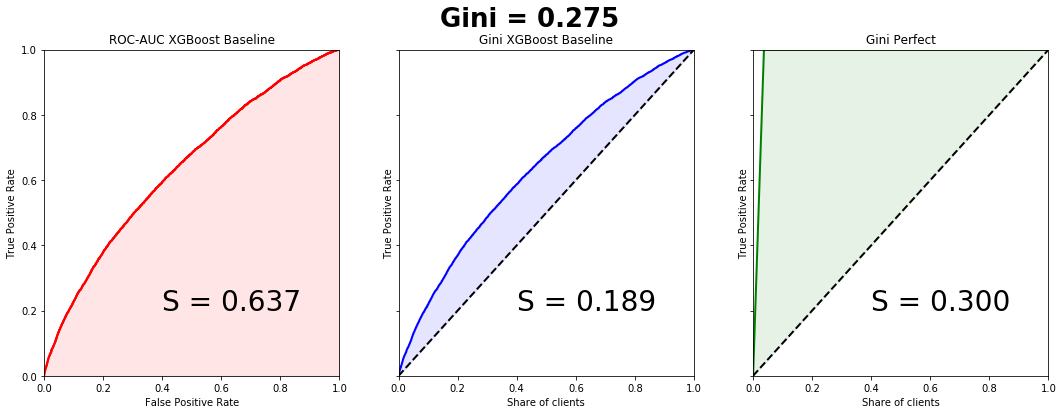

In [11]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from scipy.interpolate import interp1d
from scipy.integrate import quad

df = pd.read_csv('train.csv', index_col='id')
unwanted = df.columns[df.columns.str.startswith('ps_calc_')]
df.drop(unwanted,inplace=True,axis=1)
df.fillna(-999, inplace=True)

train, test = train_test_split(df, stratify=df.target, test_size=0.25, random_state=1)
estimator = xgb.XGBClassifier(seed=1, n_jobs=-1)
estimator.fit(train.drop('target', axis=1), train.target)
pred = estimator.predict_proba(test.drop('target', axis=1))[:, 1]
test['predict'] = pred

actual = test.target.values
predict = test.predict.values

data = zip(actual, predict)
sorted_data = sorted(data, key=lambda d: d[1], reverse=True)
sorted_actual = [d[0] for d in sorted_data]

cumulative_actual = np.cumsum(sorted_actual) / sum(actual)
cumulative_index = np.arange(1, len(cumulative_actual)+1) / len(predict)
cumulative_actual_perfect = np.cumsum(sorted(actual, reverse=True)) / sum(actual)

aucroc = roc_auc_score(actual, predict)
gini = 2*roc_auc_score(actual, predict)-1
fpr, tpr, t = roc_curve(actual, predict)
x_values = [0] + list(cumulative_index)
y_values = [0] + list(cumulative_actual)
y_values_perfect = [0] + list(cumulative_actual_perfect)

fig, ax = plt.subplots(nrows=1,ncols=3, sharey=True, figsize=(18, 6))
fig.suptitle('Gini = {:0.3f}\n\n'.format(gini),fontsize = 26, fontweight='bold')

ax[0].plot([0]+fpr.tolist(), [0]+tpr.tolist(), lw=2, color = 'red')
ax[0].plot([0]+fpr.tolist(), [0]+tpr.tolist(), lw = 2, color = 'red')
ax[0].fill_between([0]+fpr.tolist(), [0]+tpr.tolist(), color = 'red', alpha=0.1)
ax[0].text(0.4,0.2,'S = {:0.3f}'.format(aucroc),fontsize = 28)
ax[1].plot(x_values, y_values, lw = 2, color = 'blue')
ax[1].fill_between(x_values, x_values, y_values, color = 'blue', alpha=0.1)
ax[1].text(0.4,0.2,'S = {:0.3f}'.format(S_pred),fontsize = 28)
ax[2].plot(x_values, y_values_perfect, lw = 2, color = 'green')
ax[2].fill_between(x_values, x_values, y_values_perfect, color = 'green', alpha=0.1)
ax[2].text(0.4,0.2,'S = {:0.3f}'.format(S_actual),fontsize = 28)

ax[0].set(title='ROC-AUC XGBoost Baseline', xlabel='False Positive Rate', 
              ylabel='True Positive Rate', xlim=(0, 1), ylim=(0, 1))
ax[1].set(title='Gini XGBoost Baseline')
ax[2].set(title='Gini Perfect')
for i in range(1,3):
    ax[i].plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
    ax[i].set(xlabel='Share of clients', ylabel='True Positive Rate', xlim=(0, 1), ylim=(0, 1))
plt.show();

Коэффициент Джини победившей модели - 0.29698
Для меня до сих пор загадка, чего хотели добиться организаторы, занонимизировав признаки и сделав невероятную предобработку данных. Это одна из причин, почему все модели, в том числе и победившие, по сути получились мусорные. Наверное, просто пиар, раньше никто в мире не знал про Porto Seguro кроме бразильцев, теперь знают многие.

#### Целевой маркетинг

В этой области можно лучше всего понять истинный смысл коэффициента Джини и Lift Curve. Почти во всех книгах и статьях почему-то приводятся примеры с почтовыми маркетинговыми кампаниями, что на мой взгляд является анахронизмом. Создадим искусственную бизнес-задачу из сферы <a href="https://ru.wikipedia.org/wiki/Free-to-play">free2play игр</a>. У нас есть база данных пользователей когда-то игравших в нашу игру и по каким-то причинам отвалившихся. Мы хотим их вернуть в наш игровой проект, для каждого пользователя у нас есть некое признаковое пространство (время в проекте, сколько он потратил, до какого уровня дошел и т.д.) на основе которого мы строим модель. Оцениваем модель коэффициентом Джини и строим Lift Curve:

<center>
<img src="../../img/CAP_per.png">

Предположим, что в рамках маркетинговой кампании мы тем или иным способом устанавливаем контакт с пользователем (email, соцсети), цена контакта с одним пользователем - 2 рубля. Мы знаем, что <a href="https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%B6%D0%B8%D0%B7%D0%BD%D0%B5%D0%BD%D0%BD%D0%B0%D1%8F_%D1%86%D0%B5%D0%BD%D0%BD%D0%BE%D1%81%D1%82%D1%8C_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%B0">Lifetime Value</a> составляет 5 рублей. Необходимо оптимизировать эффективность маркетинговой кампании. Предположим, что всего в выборке 100 пользователей, из которых 30 вернется. Таким образом, если мы установим контакт со 100% пользователей, то потратим на маркетинговую кампанию 200 рублей и получим доход 150 рублей. Это провал кампании. Рассмотрим график Lift Curve. Видно, что при контакте с 50% пользователей, мы контактируем с 90% пользователей, которые вернутся. затраты на кампанию - 100 рублей, доход 135. Мы в плюсе. Таким образом, Lift Curve позволяет нам наилучшим образом оптимизировать нашу маркетинговую компанию. 

### 4. Сортировка пузырьком.

Коэффициент Джини имеет довольно забавную, но весьма полезную интерпретацию, с помощью которой мы его также можем легко подсчитать. Оказывается, численно он равен: 

$$Gini_{normalized} = \frac{Swaps_{random} - Swaps_{sorted}}{Swaps_{random}}$$

где, $Swaps_{sorted}$ число перестановок, которые необходимо сделать в отранжированном списке для того, чтобы получить истинный список целевой переменной, $Swaps_{random}$ - число перестановок для предсказаний случайного алгоритма. Напишем элементарную сортировку пузырьком и покажем это:

$$[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]$$
$$[1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0]$$

In [12]:
actual = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
predict = [0.9, 0.3, 0.8, 0.75, 0.65, 0.6, 0.78, 0.7, 0.05, 0.4, 0.4, 0.05, 0.5, 0.1, 0.1]

data = zip(actual, predict)
sorted_data = sorted(data, key=lambda d: d[1], reverse=False)
sorted_actual = [d[0] for d in sorted_data]
swaps=0
n = len(sorted_actual)
array = sorted_actual

for i in range(1,n):
    flag = 0
    for j in range(n-i):
        if array[j]>array[j+1]: 
            array[j], array[j+1] = array[j+1], array[j]
            flag = 1
            swaps+=1
    if flag == 0: break
        
print("Число перестановок: ", swaps)

Число перестановок:  10


Комбинаторно несложно подсчитать число перестановок для случайного алгоритма:

$$Swaps_{random} = \frac{6*9}{2} = 27$$

Таким образом:

$$Gini_{normalized} = \frac{27 - 10}{27} = 0.63$$

Видим, что мы получили значение коэффициента, как и в рассматриваемом выше игрушечном примере.

Литература:
1. <a href="https://books.google.ru/books?id=tTs2DgAAQBAJ&printsec=frontcover&dq=jiri+credit+risk&hl=ru&sa=X&ved=0ahUKEwjG38i599LZAhUJWSwKHXQxCwMQ6AEIJzAA#v=onepage&q=jiri%20credit%20risk&f=false">Jiri Witzany "Credit Risk Managment"</a>
2. <a href="https://link.springer.com/content/pdf/10.1023%2FA%3A1010920819831.pdf">A Simple Generalisation of the Area Under the ROCCurve</a>
3. <a href="https://www.kaggle.com/c/porto-seguro-safe-driver-prediction">Porto Seguro’s Safe Driver Prediction</a>
4. <a href="http://pubs.rsna.org/doi/pdf/10.1148/radiology.143.1.7063747">The Meaning and Use of the Area under a Receiver Operating Characteristic(ROC)Curve</a>
5. <a href="https://www.business-school.ed.ac.uk/crc/wp-content/uploads/sites/55/2017/03/Paper-65-Paper.pdf">Measuring the Quality of Credit Scoring Models</a>
6. <a href="https://www.youtube.com/watch?v=reiZ61V2OlI">Assessing your model using the cap curve</a>